In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
import matplotlib
from mpl_toolkits import mplot3d
plt.rcParams['animation.html'] = 'html5'
#%matplotlib notebook

In [2]:
direct = "KdV_forced_resonance/"
U = np.load(direct + "U.npy")
T = np.load(direct + "T.npy")
X = np.load(direct + "X.npy")

In [3]:
fig, axes = plt.subplots(figsize=(8, 4))
plt.title('Solution animation')
plt.xlim(X[0], X[-1])
A = np.max(np.abs(U))
plt.ylim(-0.5, 2.5)
plt.grid()
plt.xlabel("x, mm")
plt.ylabel("deform")
line1, = axes.plot([], [], lw=2)
line2, = axes.plot([], [], lw=2)
time_template = 'time = %.2f'
time_text = axes.text(0.85, 0.9, '', transform=axes.transAxes)
plt.minorticks_on()
plt.close()

def plot_frame(i):
    axes.set_xlim(X[0], X[-1])
    line1.set_data(X, -U[i])
    time_text.set_text(time_template % T[i])
    fig.canvas.draw()
    return fig

anim = matplotlib.animation.FuncAnimation(fig, plot_frame, frames=int(len(U)), interval=100, repeat=False)

In [4]:
anim

In [5]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15)

In [6]:
anim.save(direct + 'evol.mp4', writer=writer)

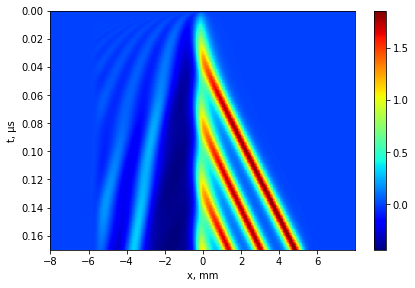

In [28]:
fig = plt.figure(figsize=(6,4))
plt.imshow(-U, cmap='jet', aspect='auto', 
           extent=[X[0], X[-1], T[-1], T[0]])
plt.xlabel('x, mm')
plt.ylabel('t, μs')
#plt.clim(-0.0005, 0.001)
plt.colorbar()
plt.subplots_adjust(left=0.12, right=1, top=0.95, bottom=0.12)
plt.savefig(direct + 'colormap.pdf')
plt.show()

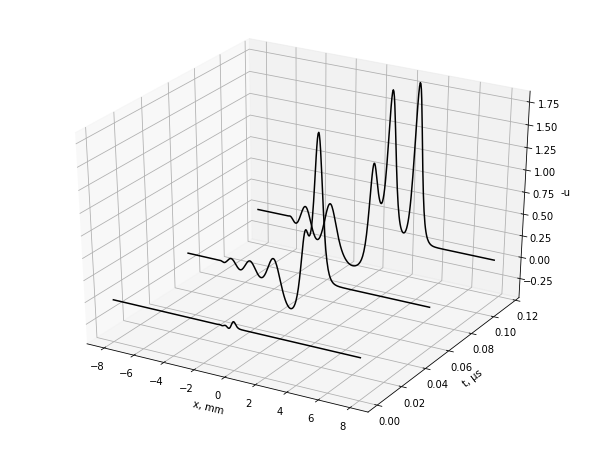

In [4]:
fig = plt.figure(figsize=(8,6))
ax = plt.axes(projection='3d')
ax.set_xlabel('x, mm')
ax.set_ylabel('t, μs')
ax.set_zlabel('-u')
plt.subplots_adjust(left=0.0, right=1, top=1, bottom=0.01)
for i in range(1, len(T), int(len(T)/3)):
    ax.plot(X, np.ones_like(X)*T[i], -U[i], color = 'black')
plt.savefig(direct + 'wires.pdf')

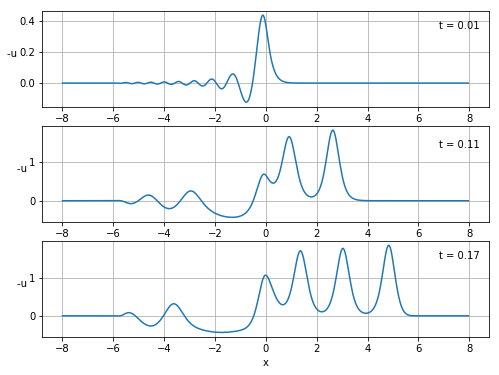

In [20]:
fig = plt.figure(figsize=(8,6))

plt.subplot(311)
plt.plot(X, -U[10])
plt.text(X[-30], 0.35, 't = %.2f' % T[10])
plt.grid()
h = plt.ylabel('-u  ')
h.set_rotation(0)

plt.subplot(312)
plt.plot(X, -U[110])
plt.text(X[-30], 1.35, 't = %.2f' % T[110])
plt.grid()
h = plt.ylabel('-u  ')
h.set_rotation(0)

plt.subplot(313)
plt.plot(X, -U[170])
plt.text(X[-30], 1.5, 't = %.2f' % T[170])
plt.grid()
h = plt.ylabel('-u  ')
h.set_rotation(0)
plt.xlabel('x')

plt.savefig(direct + 'sequence.pdf')
plt.show()